# Análisis Exploratorio de Datos (EDA) - Predicción de Salarios

Este notebook contiene el análisis exploratorio inicial del dataset de salarios para identificar patrones, relaciones y características relevantes para el modelo predictivo.

## 1. Importación de Librerías

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## 2. Carga y Fusión de Datos

In [4]:
data_path = Path('../data/raw')

people_df = pd.read_csv(data_path / 'people.csv')
salary_df = pd.read_csv(data_path / 'salary.csv')
descriptions_df = pd.read_csv(data_path / 'descriptions.csv')

print(f"People shape: {people_df.shape}")
print(f"Salary shape: {salary_df.shape}")
print(f"Descriptions shape: {descriptions_df.shape}")

People shape: (375, 6)
Salary shape: (375, 2)
Descriptions shape: (375, 2)


In [5]:
df = people_df.merge(salary_df, on='id', how='inner').merge(descriptions_df, on='id', how='inner')

print(f"\nDataset fusionado: {df.shape}")
print(f"Registros totales: {len(df)}")
df.head()


Dataset fusionado: (375, 8)
Registros totales: 375


,id,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Description
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,I am a 32-year-old male working as a Software ...
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,I am a 28-year-old data analyst with a Master'...
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,I am a 45-year-old Senior Manager with a PhD a...
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,I am a 36-year-old female Sales Associate with...
4,4,52.0,Male,Master's,Director,20.0,200000.0,I am a 52-year-old male with over two decades ...


## 3. Análisis Descriptivo

### 3.1 Información General del Dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   375 non-null    int64  
 1   Age                  370 non-null    float64
 2   Gender               370 non-null    object 
 3   Education Level      370 non-null    object 
 4   Job Title            370 non-null    object 
 5   Years of Experience  373 non-null    float64
 6   Salary               373 non-null    float64
 7   Description          372 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 23.6+ KB


### 3.2 Estadísticas Descriptivas

In [8]:
df.describe()

,id,Age,Years of Experience,Salary
count,375.000000,370.000000,373.000000,373.000000
mean,187.000000,37.437838,10.030831,100577.345845
std,108.397417,7.080465,6.557007,48240.013482
min,0.000000,23.000000,0.000000,350.000000
25%,93.500000,31.250000,4.000000,55000.000000
50%,187.000000,36.000000,9.000000,95000.000000
75%,280.500000,44.000000,15.000000,140000.000000
max,374.000000,53.000000,25.000000,250000.000000


### 3.3 Valores Nulos

In [9]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Valores Nulos': missing_values,
    'Porcentaje': missing_percent
}).sort_values(by='Valores Nulos', ascending=False)

print(missing_df[missing_df['Valores Nulos'] > 0])



                     Valores Nulos  Porcentaje
Age                              5    1.333333
Gender                           5    1.333333
Education Level                  5    1.333333
Job Title                        5    1.333333
Description                      3    0.800000
Years of Experience              2    0.533333
Salary                           2    0.533333


### 3.4 Registros Duplicados

In [10]:
duplicates = df.duplicated().sum()
print(f"Registros duplicados: {duplicates}")

duplicates_by_id = df['id'].duplicated().sum()
print(f"IDs duplicados: {duplicates_by_id}")

Registros duplicados: 0
IDs duplicados: 0


## 4. Visualización de Distribuciones

### 4.1 Histogramas de Variables Numéricas

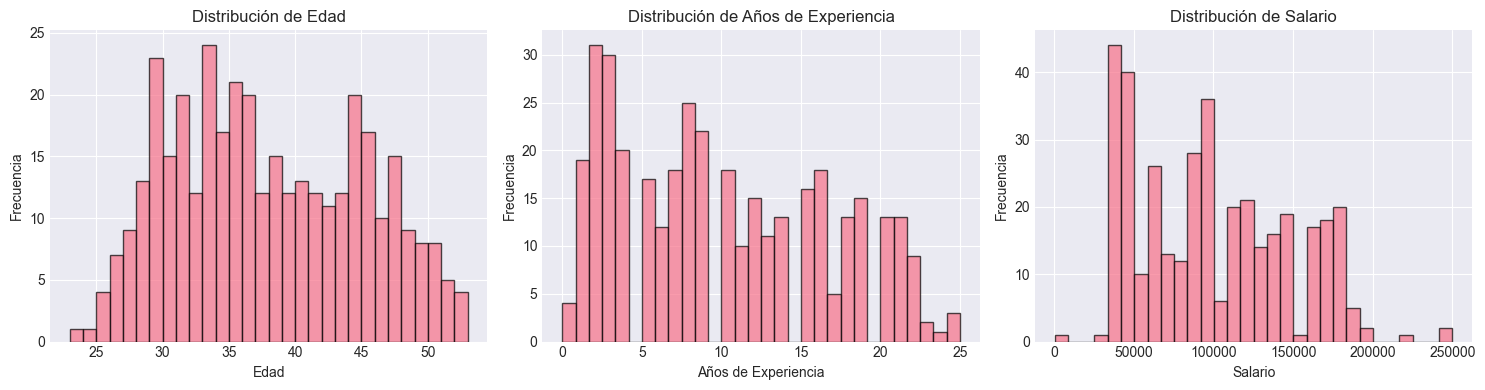

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].hist(df['Age'], bins=30, edgecolor='black', alpha=0.7)
axes[0].set_title('Distribución de Edad')
axes[0].set_xlabel('Edad')
axes[0].set_ylabel('Frecuencia')

axes[1].hist(df['Years of Experience'], bins=30, edgecolor='black', alpha=0.7)
axes[1].set_title('Distribución de Años de Experiencia')
axes[1].set_xlabel('Años de Experiencia')
axes[1].set_ylabel('Frecuencia')

axes[2].hist(df['Salary'], bins=30, edgecolor='black', alpha=0.7)
axes[2].set_title('Distribución de Salario')
axes[2].set_xlabel('Salario')
axes[2].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

### 4.2 Distribución de Variables Categóricas

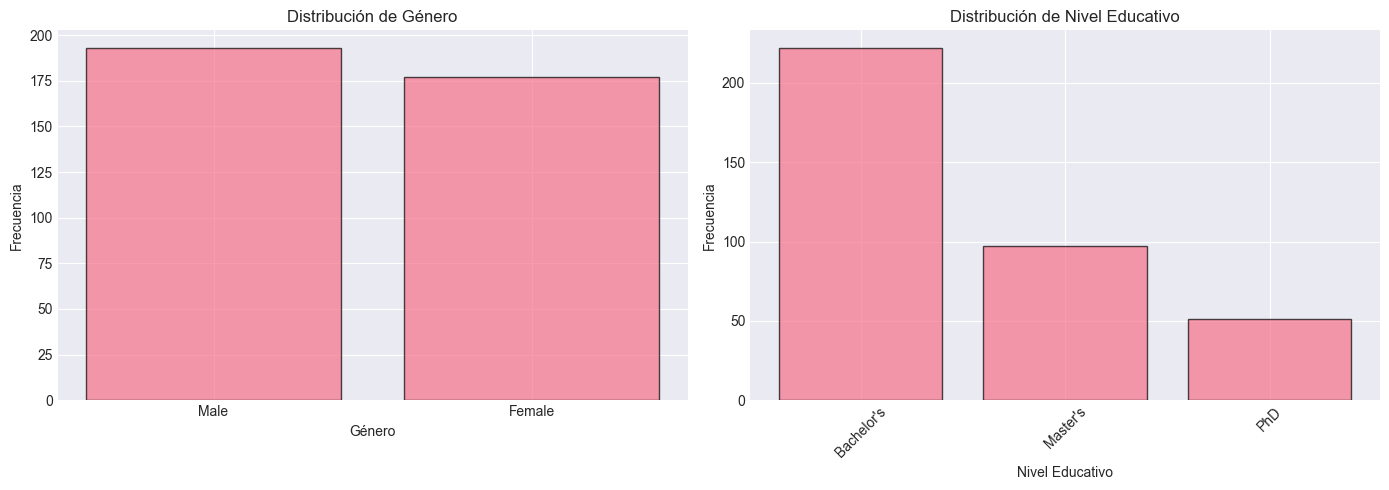

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

gender_counts = df['Gender'].value_counts()
axes[0].bar(gender_counts.index, gender_counts.values, edgecolor='black', alpha=0.7)
axes[0].set_title('Distribución de Género')
axes[0].set_xlabel('Género')
axes[0].set_ylabel('Frecuencia')

education_counts = df['Education Level'].value_counts()
axes[1].bar(education_counts.index, education_counts.values, edgecolor='black', alpha=0.7)
axes[1].set_title('Distribución de Nivel Educativo')
axes[1].set_xlabel('Nivel Educativo')
axes[1].set_ylabel('Frecuencia')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

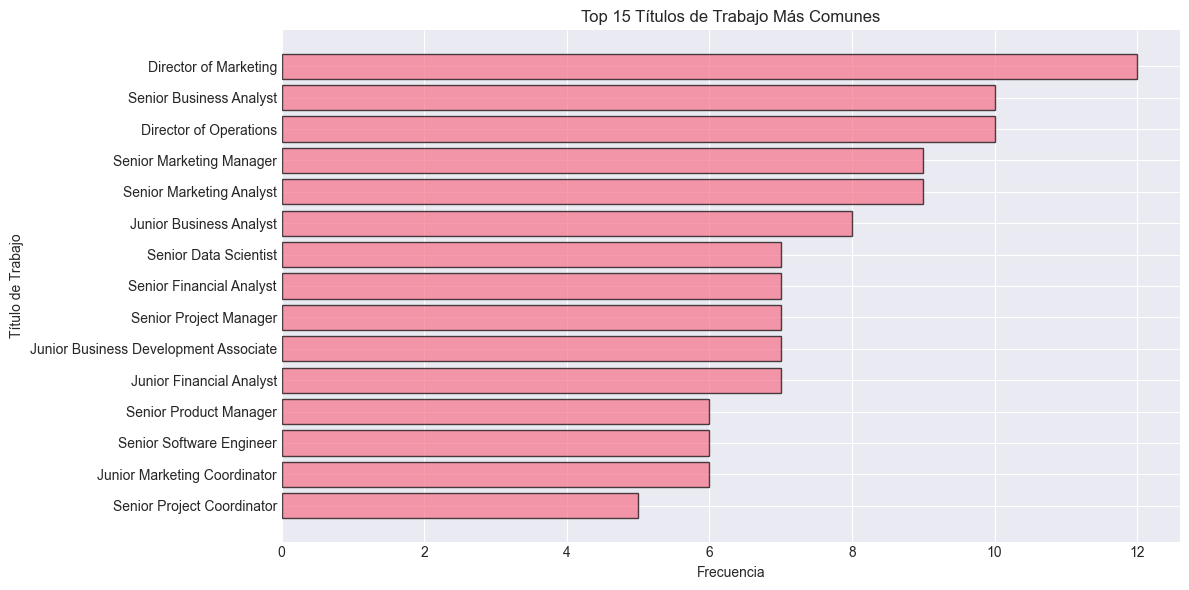

In [13]:
top_jobs = df['Job Title'].value_counts().head(15)

plt.figure(figsize=(12, 6))
plt.barh(top_jobs.index, top_jobs.values, edgecolor='black', alpha=0.7)
plt.title('Top 15 Títulos de Trabajo Más Comunes')
plt.xlabel('Frecuencia')
plt.ylabel('Título de Trabajo')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 5. Análisis de Correlaciones

### 5.1 Mapa de Calor de Correlaciones

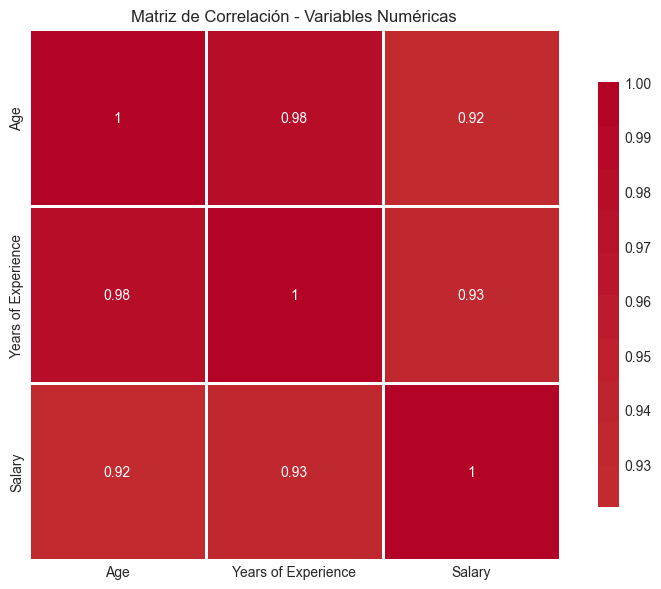

In [14]:
numeric_cols = ['Age', 'Years of Experience', 'Salary']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación - Variables Numéricas')
plt.tight_layout()
plt.show()

### 5.2 Scatter Plot: Años de Experiencia vs Salario

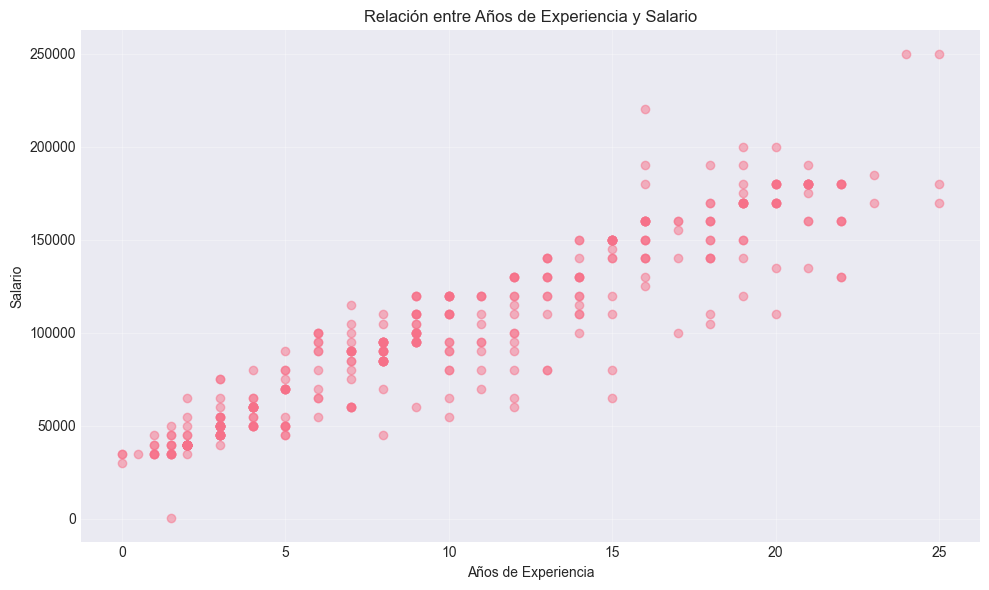

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Years of Experience'], df['Salary'], alpha=0.5)
plt.title('Relación entre Años de Experiencia y Salario')
plt.xlabel('Años de Experiencia')
plt.ylabel('Salario')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 6. Análisis de Relaciones Categóricas

### 6.1 Boxplot: Nivel Educativo vs Salario

In [16]:
education_salary = df.groupby('Education Level')['Salary'].median().sort_values()
print(education_salary)

Education Level
Bachelor's     65000.0
Master's      120000.0
PhD           155000.0
Name: Salary, dtype: float64


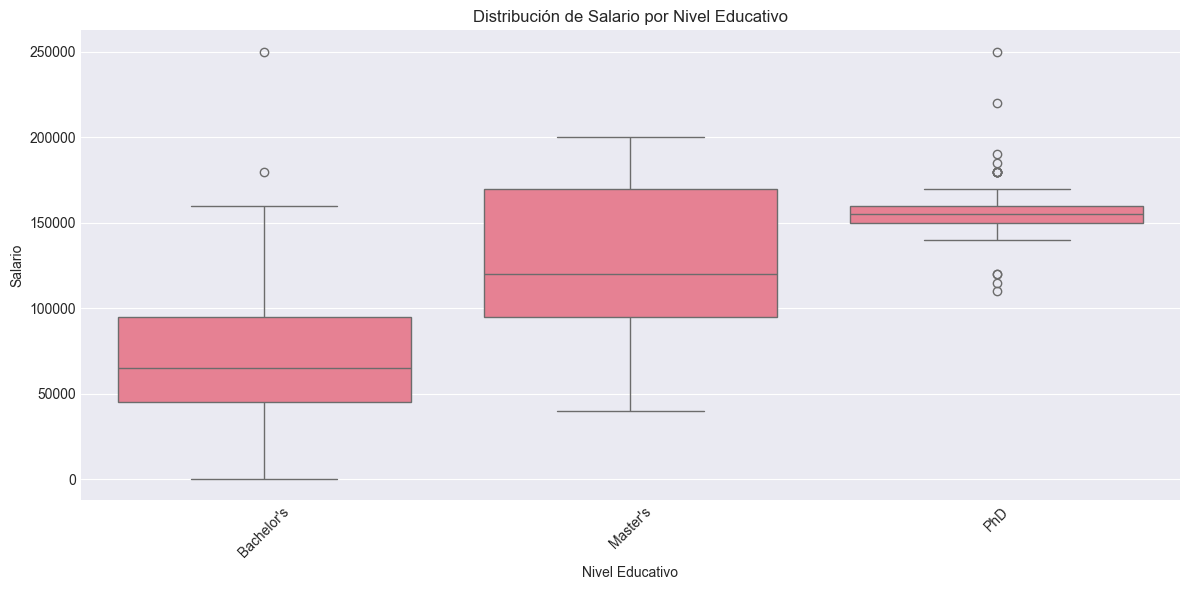

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Education Level', y='Salary')
plt.title('Distribución de Salario por Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Salario')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Salario Superior en Postgrado**

- Los salarios de **Master's** ($120,000) y **PhD** ($155,000) son notablemente más altos que el de **Bachelor's** ($65,000).
- La diferencia en la mediana es de **$55,000** para Master's vs Bachelor's y **$90,000** para PhD vs Bachelor's.

---

**PhD: Mayor Mediana y Menor Varianza**

- La mediana de **PhD** ($155,000) es mayor que la de **Master's** ($120,000).
- El nivel de **PhD** presenta una menor varianza salarial:
    - **Rango Intercuartílico (RIC)**: solo **$10,000** para PhD (Con presencia de Outliers) vs **$65,000** para Master's.
    - Esto indica que la mayoría de los salarios de Doctorado están muy concentrados alrededor de la mediana, mientras que los salarios de Maestría tienen una distribución central más amplia.

### 6.2 Boxplot: Género vs Salario

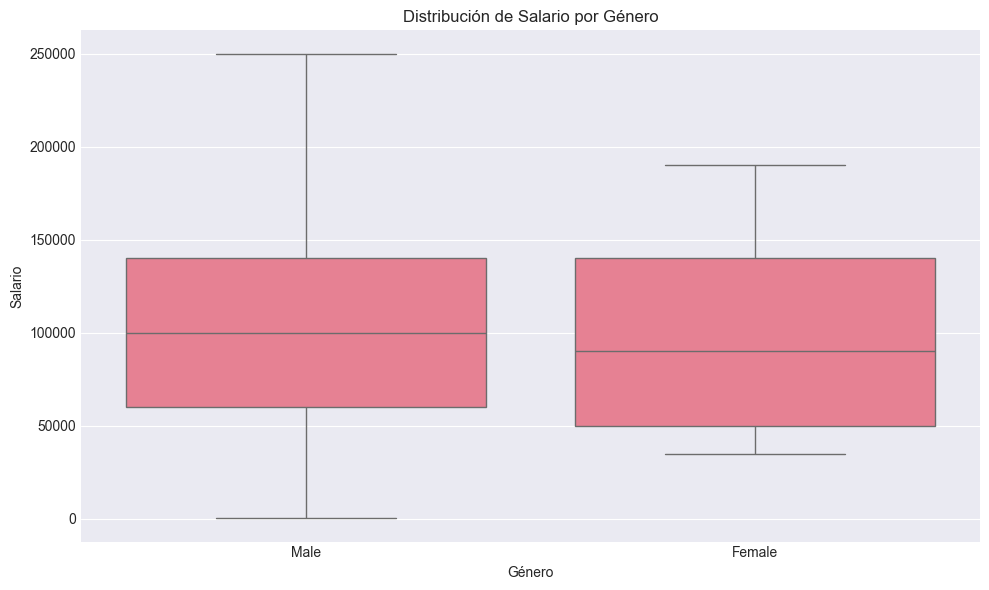

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='Salary')
plt.title('Distribución de Salario por Género')
plt.xlabel('Género')
plt.ylabel('Salario')
plt.tight_layout()
plt.show()

### 6.3 Salario Promedio por Nivel Educativo

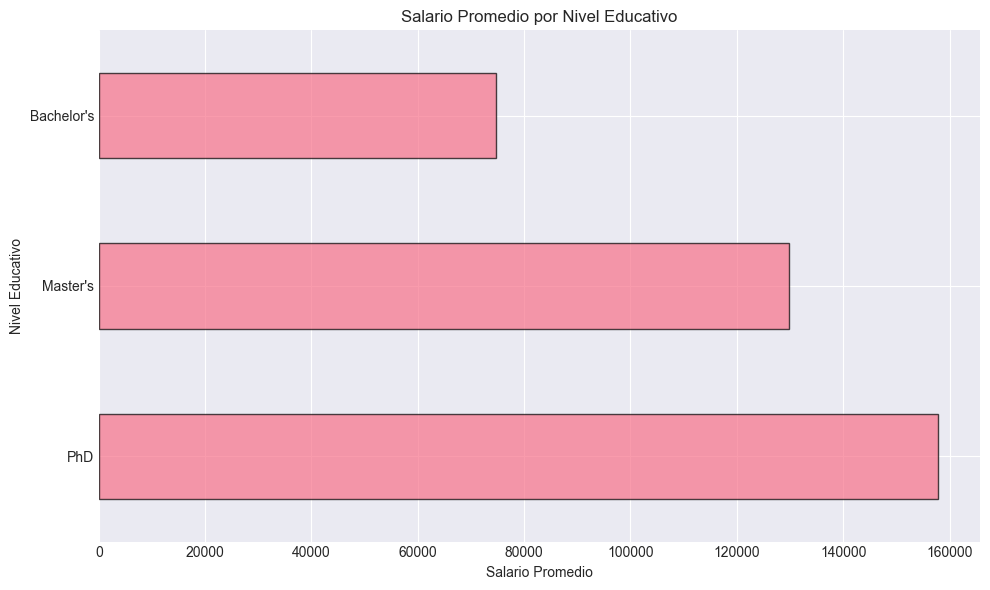


Salario Promedio por Nivel Educativo:
Education Level
PhD           157843.137255
Master's      129896.907216
Bachelor's     74663.738739
Name: Salary, dtype: float64


In [19]:
avg_salary_education = df.groupby('Education Level')['Salary'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
avg_salary_education.plot(kind='barh', edgecolor='black', alpha=0.7)
plt.title('Salario Promedio por Nivel Educativo')
plt.xlabel('Salario Promedio')
plt.ylabel('Nivel Educativo')
plt.tight_layout()
plt.show()

print("\nSalario Promedio por Nivel Educativo:")
print(avg_salary_education)

### 6.4 Salario Promedio por Rol

In [22]:
high_avg_job_title_salary = df.groupby('Job Title')['Salary'].mean().sort_values(ascending=False).head(5)
print(high_avg_job_title_salary)
print("------------------------------------")

low_avg_job_title_salary = df.groupby('Job Title')['Salary'].mean().sort_values(ascending=True).head(5)
print(low_avg_job_title_salary)


Job Title
CEO                         250000.0
Chief Technology Officer    250000.0
Chief Data Officer          220000.0
Director                    200000.0
VP of Finance               200000.0
Name: Salary, dtype: float64
------------------------------------
Job Title
Junior Business Operations Analyst    17675.0
Sales Representative                  30000.0
Data Entry Clerk                      35000.0
Help Desk Analyst                     35000.0
Junior Customer Support Specialist    35000.0
Name: Salary, dtype: float64


### Puestos laborales con el Salario Promedio Más Alto (Top 5)

Los puestos con los salarios promedio más altos corresponden a roles de alta dirección y liderazgo estratégico:

- **CEO (Chief Executive Officer)** y **Chief Technology Officer (CTO)**: salario promedio máximo de **$250,000**.
- **Chief Data Officer**: salario promedio de **$220,000**.
- **Director** y **VP of Finance (Vicepresidente de Finanzas)**: salario promedio de **$200,000**.

En resumen, el Top 5 está compuesto por cargos ejecutivos (C-suite) y de alta dirección, todos con salarios superiores a **$200,000**.

---

### Puestos laborales con el Salario Promedio Más Bajo (Bottom 5)

Los puestos con los salarios promedio más bajos suelen ser roles de nivel inicial o de soporte operativo:

- **Junior Business Operations Analyst**: salario promedio más bajo de **$17,675**.
- **Sales Representative**: salario promedio de **$30,000**.
- **Data Entry Clerk**, **Help Desk Analyst** y **Junior Customer Support Specialist**: salario promedio de **$35,000** cada uno.

En conclusión, el Bottom 5 está formado por puestos junior, administrativos y de atención al cliente, con salarios promedio entre **$17,675** y **$35,000**.


----
## 7. Conclusiones del EDA

**Observaciones clave del análisis exploratorio:**

1. **Calidad de Datos**: El dataset está completo con un porcentaje muy bajo de valores nulos y sin duplicados.
2. **Variables Numéricas**: Se observan distribuciones razonables en edad, experiencia y salario
3. **Correlación**: Existe una relación positiva muy fuerte entre años de experiencia, edad y salario
4. **Nivel Educativo**: Impacto significativo del nivel educativo en el salario
5. **Distribución de Trabajos**: Amplia variedad de roles de trabajo en el dataset

Estos insights serán fundamentales para el diseño del pipeline de preprocesamiento y la selección de features para el modelo predictivo.